## Mobility Safty - 311 Reports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas 

In [2]:
# Brining in data file
df = pd.read_csv('311.csv')

In [3]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


In [4]:
df.shape

(606470, 17)

In [5]:
df.NEIGHBORHOOD.unique()

array(['Central Northside', 'South Side Flats', 'Troy Hill', 'Banksville',
       'East Hills', 'Mount Washington', 'Bluff', 'Middle Hill',
       'North Oakland', 'Central Business District',
       'Spring Hill-City View', 'Brighton Heights', 'Marshall-Shadeland',
       nan, 'Lower Lawrenceville', 'Windgap', 'Brookline', 'Beechview',
       'Perry North', 'Carrick', 'East Allegheny', 'Bloomfield',
       'Sheraden', 'Manchester', 'Larimer', 'Upper Hill', 'Point Breeze',
       'Lincoln-Lemington-Belmar', 'Knoxville', 'Morningside', 'Fineview',
       'Central Lawrenceville', 'Squirrel Hill South',
       'South Side Slopes', 'Overbrook', 'South Oakland', 'North Shore',
       'Garfield', 'California-Kirkbride', 'Crawford-Roberts',
       'Perry South', 'Point Breeze North', 'Elliott', 'Homewood West',
       'Spring Garden', 'Allentown', 'Summer Hill', 'Hazelwood',
       'Squirrel Hill North', 'Allegheny Center', 'Westwood',
       'Strip District', 'Regent Square', 'Stanton Height

Narrowing dataset to only the required columns

In [8]:
df1 = df[['REQUEST_TYPE', 'NEIGHBORHOOD']]

In [9]:
df1.head()

,REQUEST_TYPE,NEIGHBORHOOD
0,Street Obstruction/Closure,Central Northside
1,Graffiti,South Side Flats
2,Litter,Troy Hill
3,Water Main Break,Banksville
4,Guide Rail,East Hills


In [10]:
#Group by NEIGHBORHOOD and find the total reports for each:
numOfReport = df1.groupby("NEIGHBORHOOD" , as_index = False).agg({'REQUEST_TYPE': 'count'}).sort_values('REQUEST_TYPE', ascending=True)

In [11]:
numOfReport

,NEIGHBORHOOD,REQUEST_TYPE
52,Mount Oliver Borough,61
4,Arlington Heights,128
35,Glen Hazel,394
26,East Carnegie,571
58,Northview Heights,576
...,...,...
72,South Side Flats,18083
73,South Side Slopes,19626
77,Squirrel Hill South,20255
15,Carrick,23575


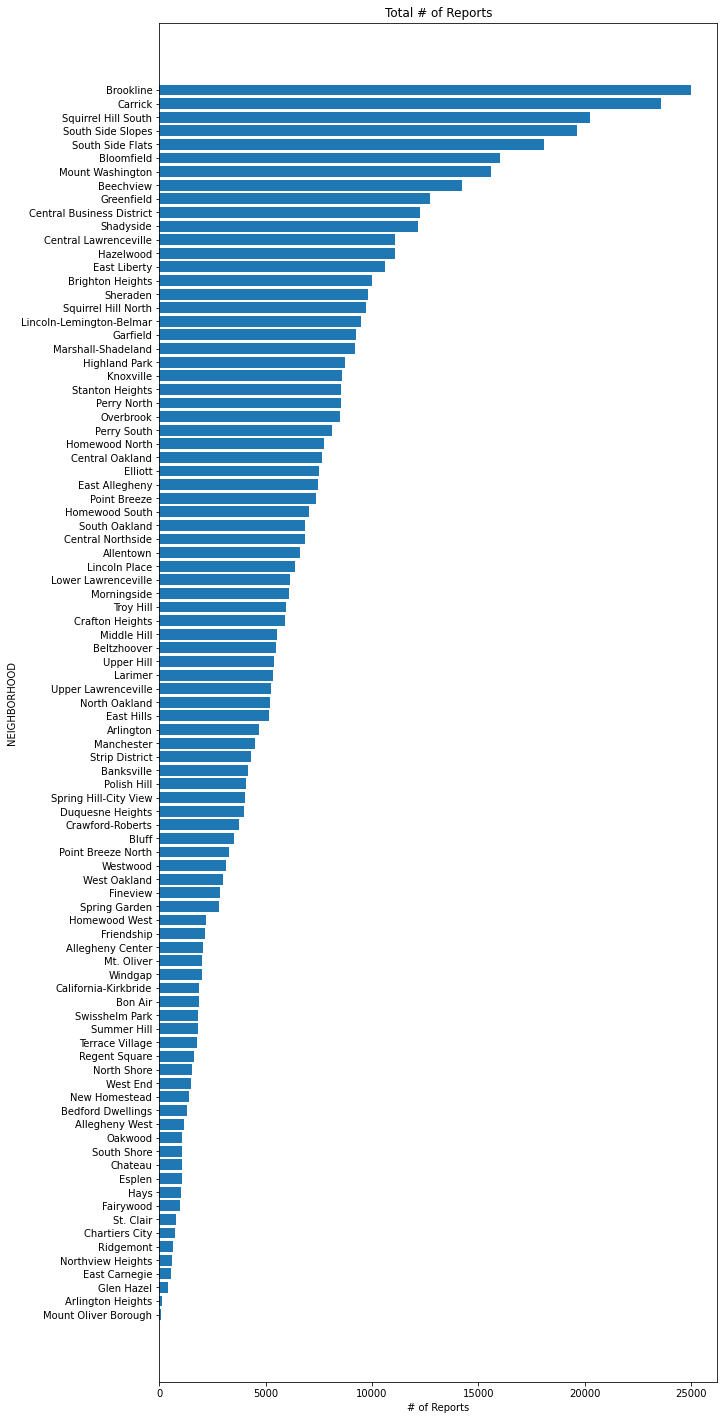

In [12]:
#Bar Chart for total reports:
y_axis = numOfReport['NEIGHBORHOOD']
x_axis = numOfReport['REQUEST_TYPE']

plt.figure(figsize=(10,25))
plt.barh(y_axis,x_axis)
plt.title('Total # of Reports')
plt.ylabel('NEIGHBORHOOD')
plt.xlabel('# of Reports')
plt.show()

In [18]:
#Changing rows to REQUEST_TYPE to lower case
df1["REQUEST_TYPE"] = df1["REQUEST_TYPE"].str.lower()

<ipython-input-18-9b13daadfaea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["REQUEST_TYPE"] = df1["REQUEST_TYPE"].str.lower()


In [19]:
#Finding all the reports that contain the word sidewalk
df2 = df1.query('REQUEST_TYPE.str.startswith("sidewalk")')

In [20]:
df2

,REQUEST_TYPE,NEIGHBORHOOD
6,sidewalk/curb/hc ramp maintenance,Mount Washington
20,sidewalk/curb/hc ramp maintenance,Perry North
23,sidewalk obstruction,Central Business District
335,sidewalk/curb/hc ramp maintenance,Central Business District
472,sidewalk/curb/hc ramp maintenance,South Side Flats
...,...,...
604949,sidewalk has ice or litter,Elliott
604950,sidewalk/curb/ada ramp maintenance,Banksville
605479,sidewalk has ice or litter,Mount Washington
605957,sidewalk/curb/ada ramp maintenance,Central Business District


In [21]:
#Regroping NEIGHBORHOOD with total reports that contain the term sidewalk
numOfReport = df2.groupby("NEIGHBORHOOD" , as_index = False).agg({'REQUEST_TYPE': 'count'}).sort_values('REQUEST_TYPE', ascending=True)

In [22]:
numOfReport

,NEIGHBORHOOD,REQUEST_TYPE
4,Arlington Heights,1
33,Glen Hazel,2
79,Summer Hill,2
50,Mount Oliver Borough,2
56,Northview Heights,3
...,...,...
13,Brookline,301
66,Shadyside,311
16,Central Business District,327
74,Squirrel Hill North,334


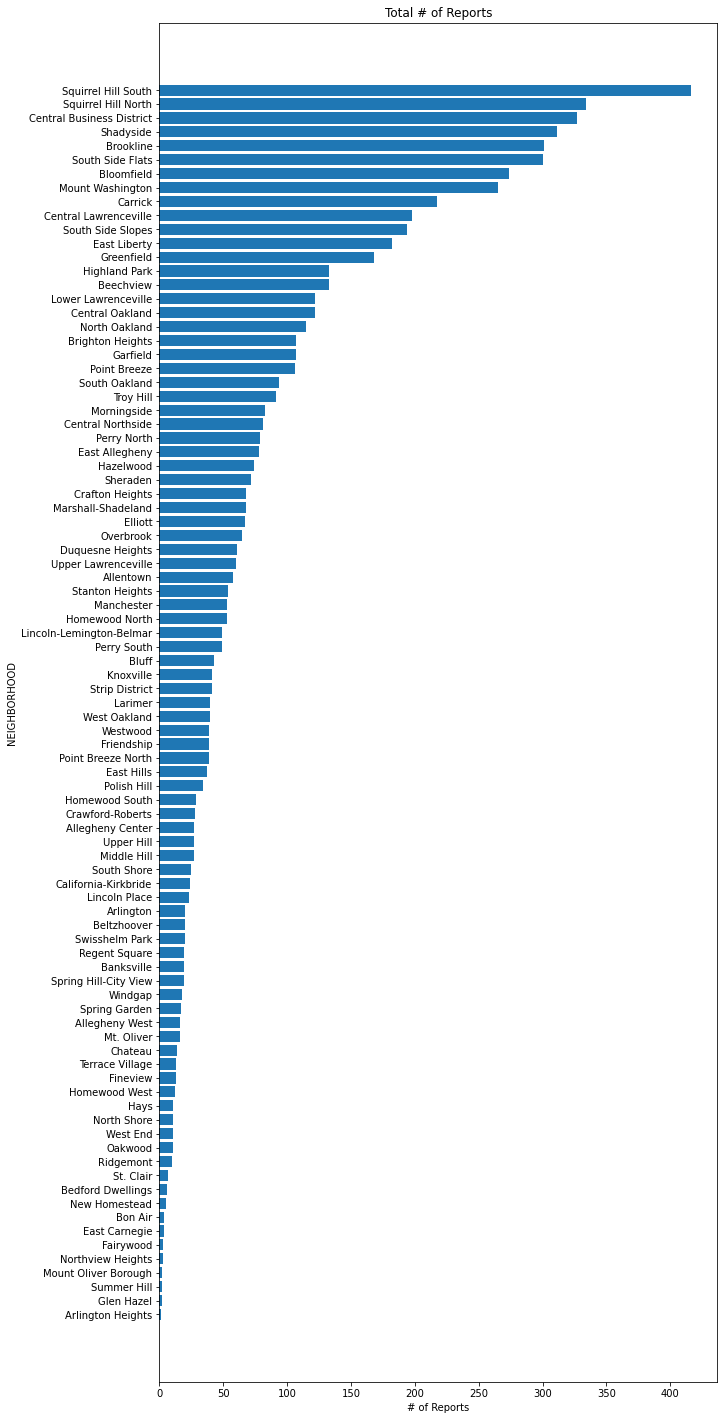

In [23]:
#Bar chart
y_axis = numOfReport['NEIGHBORHOOD']
x_axis = numOfReport['REQUEST_TYPE']

plt.figure(figsize=(10,25))
plt.barh(y_axis,x_axis)
plt.title('Total # of Reports')
plt.ylabel('NEIGHBORHOOD')
plt.xlabel('# of Reports')
plt.show()

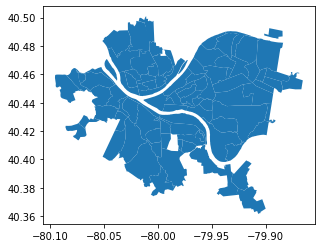

In [24]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [25]:
# do the merge
sidewalk_reports = neighborhoods.merge(numOfReport , how='left', left_on='hood', right_on='NEIGHBORHOOD')
# look at the head to confirm it merged correctly
sidewalk_reports[['hood','REQUEST_TYPE','geometry']].head()

,hood,REQUEST_TYPE,geometry
0,Central Oakland,122.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,115.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,40.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,28.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,41.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


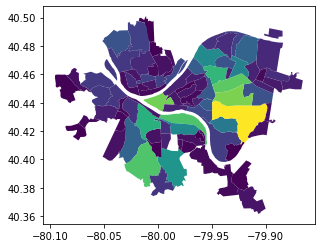

In [26]:
# draw a choropleth map using data from the column named "number_of_steps"
sidewalk_reports.plot(column='REQUEST_TYPE')

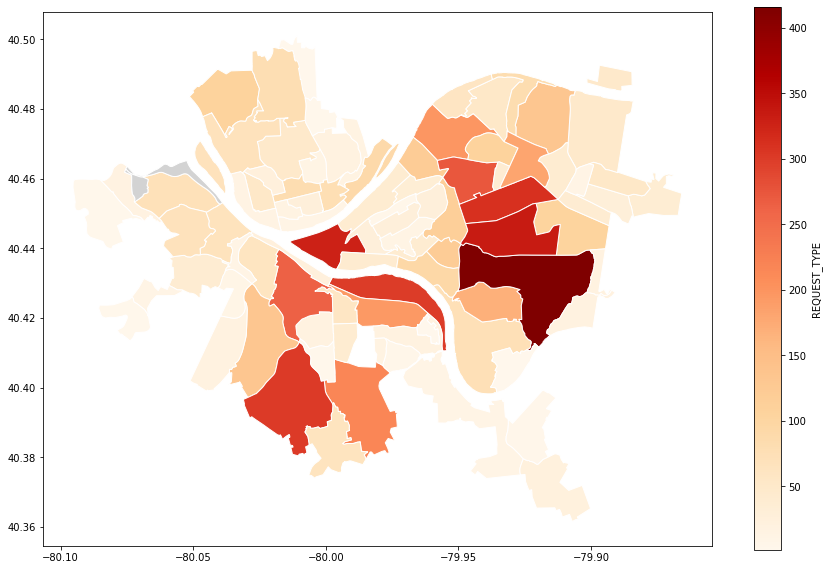

In [27]:
sidewalk_reports.plot(column='REQUEST_TYPE', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "REQUEST_TYPE"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

SyntaxError: unexpected EOF while parsing (<ipython-input-28-e206f4ecdc56>, line 3)

SyntaxError: unexpected EOF while parsing (<ipython-input-27-0459e453cb27>, line 1)